In [1]:
import pandas as pd
import numpy as np

In [2]:
twitter_tweets = pd.read_csv('tweets.csv')

In [3]:
twitter_tweets[0:10]

,Unnamed: 0,0
0,0,| Les résultats des demi-finales des électi...
1,1,نتائج شبه نهائية للانتخابات الإسرائيلية تؤكد ف...
2,2,"This Saturday, join Jane, Donné, Christie, and..."
3,3,Mr. President: Please call Benjamin Netanyahu...
4,4,"OPINIÓN | ""Benjamin Netanyahu es capaz de agl..."
5,5,La elección de Benjamín Netanyahu crea otro fo...
6,6,This is why Benjamin Netanyahu is involved in ...
7,7,Parabéns ao Benjamin \n@Netanyahu\n pela retom...
8,8,"You gave us Benjamin Netanyahu, Menachem Begin..."
9,9,"Benjamin Netanyahu, Israel's comeback leader “..."


In [4]:
twitter_tweets.isnull().sum()

Unnamed: 0    0
0             0
dtype: int64

In [5]:
twitter_tweets = twitter_tweets.dropna()

In [6]:
def convert_lowercase(column):
    column = column.str.lower()
    return column

In [7]:
twitter_tweets['0'] = convert_lowercase(twitter_tweets['0'])
twitter_tweets

,Unnamed: 0,0
0,0,| les résultats des demi-finales des électi...
1,1,نتائج شبه نهائية للانتخابات الإسرائيلية تؤكد ف...
2,2,"this saturday, join jane, donné, christie, and..."
3,3,mr. president: please call benjamin netanyahu...
4,4,"opinión | ""benjamin netanyahu es capaz de agl..."
...,...,...
260,260,an aerial unit has successfully gave a lapdanc...
261,261,thank u my father god according to my prayer o...
262,262,regreso al poder el carnicero de benjamin neta...
263,263,"en estos momentos, israel está bombardeando nu..."


In [8]:
import string
exclude = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

In [9]:
twitter_tweets['0']

0         | les résultats des demi-finales des électi...
1      نتائج شبه نهائية للانتخابات الإسرائيلية تؤكد ف...
2      this saturday, join jane, donné, christie, and...
3      mr. president:  please call benjamin netanyahu...
4       opinión | "benjamin netanyahu es capaz de agl...
                             ...                        
260    an aerial unit has successfully gave a lapdanc...
261    thank u my father god according to my prayer o...
262    regreso al poder el carnicero de benjamin neta...
263    en estos momentos, israel está bombardeando nu...
264    thank u my father god according to my prayer o...
Name: 0, Length: 265, dtype: object

In [10]:
twitter_tweets['0'] = twitter_tweets['0'].str.replace('[{}]'.format(string.punctuation), '')

/tmp/ipykernel_73581/3799092608.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  twitter_tweets['0'] = twitter_tweets['0'].str.replace('[{}]'.format(string.punctuation), '')


In [11]:
twitter_tweets

,Unnamed: 0,0
0,0,les résultats des demifinales des élection...
1,1,نتائج شبه نهائية للانتخابات الإسرائيلية تؤكد ف...
2,2,this saturday join jane donné christie and doo...
3,3,mr president please call benjamin netanyahu a...
4,4,opinión benjamin netanyahu es capaz de aglut...
...,...,...
260,260,an aerial unit has successfully gave a lapdanc...
261,261,thank u my father god according to my prayer o...
262,262,regreso al poder el carnicero de benjamin neta...
263,263,en estos momentos israel está bombardeando nue...


In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [14]:
scores = pd.DataFrame([{'negative':0, 'positive': 0}])

In [15]:
for i in twitter_tweets['0']:
    score = SentimentIntensityAnalyzer().polarity_scores(i)
    if score['neg'] > score['pos']:
        scores['negative'][0] +=1
    elif score['neg'] < score['pos']:
        scores['positive'][0] +=1


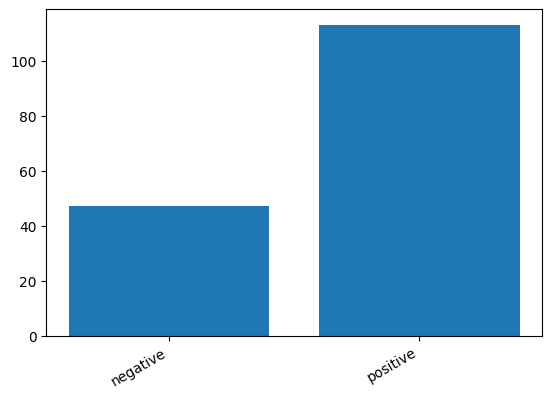

In [18]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.bar(['negative','positive'],[scores['negative'][0],scores['positive'][0]])
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()